In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [7]:
plt.rcParams["figure.figsize"] = (18,10)

In [2]:
def make_simple_plot():
    fig, axes=plt.subplots(figsize=(12,5), nrows=1, ncols=2);
    axes[0].set_ylabel("$y$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([-2,2])
    axes[1].set_ylim([-2,2])
    plt.tight_layout();
    return axes
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

## The process of learning

### A real simple example

In [3]:
df = pd.read_csv("religion.csv")
df.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


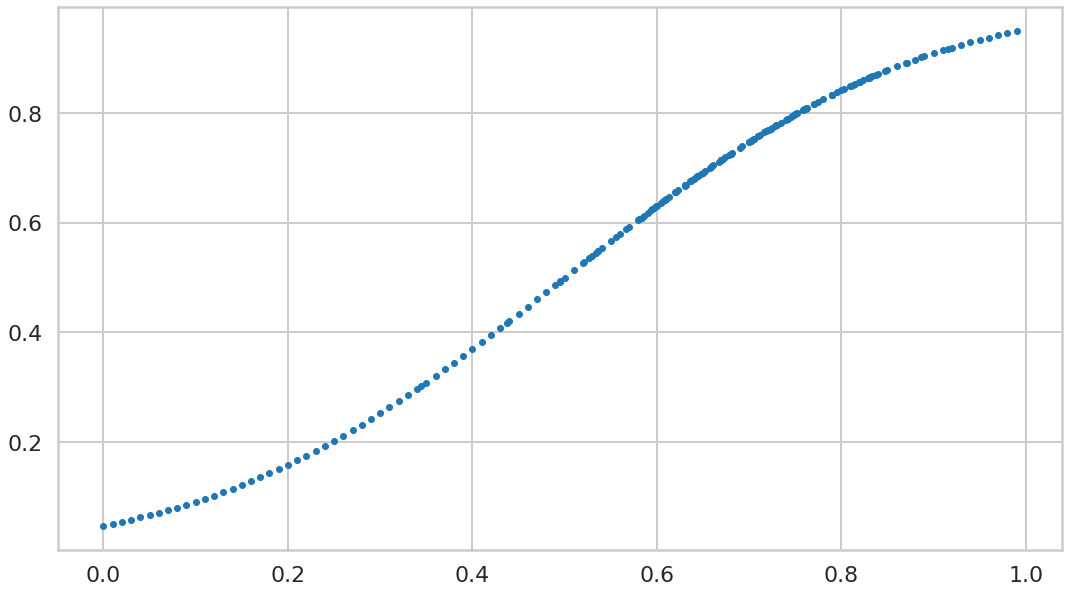

In [8]:
x=df.rfrac.values
f=df.promney.values
plt.plot(x, f, '.')

In [9]:
x.shape

(200,)

In [10]:
indexes = np.sort(np.random.choice(x.shape[0], size=30, replace=False))

In [11]:
samplex = x[indexes]
samplef = f[indexes]

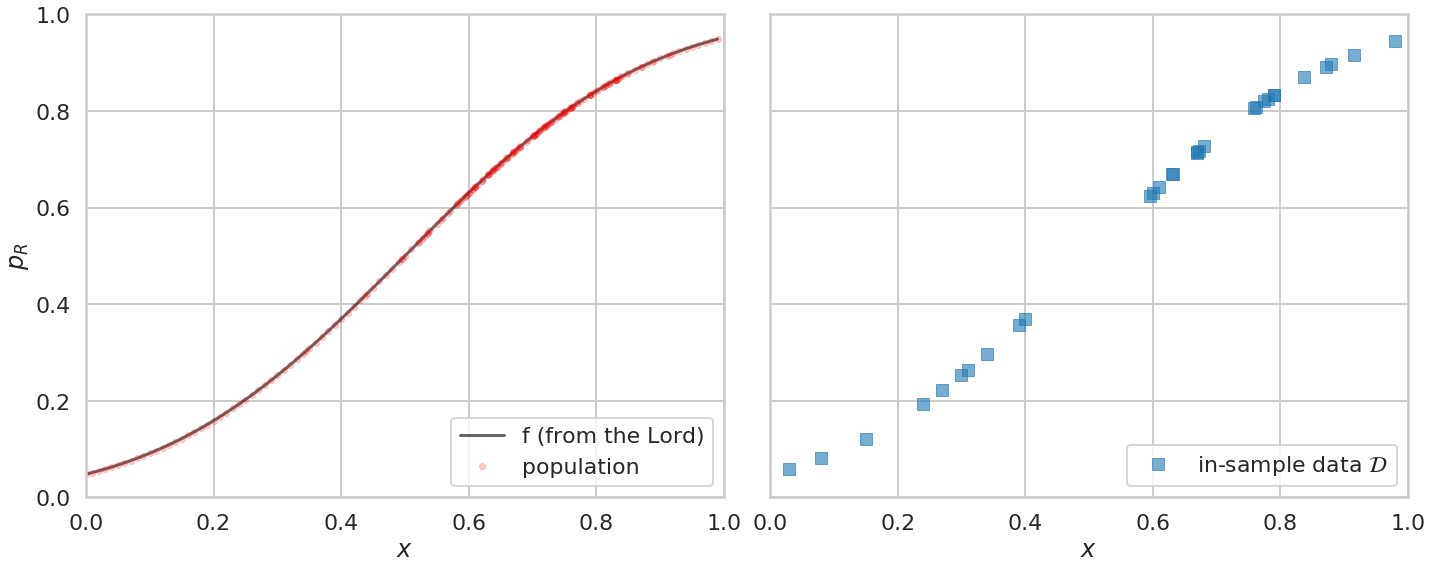

In [33]:
axes=make_plot()
axes[0].plot(x, f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(x, f, 'r.', alpha=0.2, label="population");
axes[1].plot(samplex, samplef, 's', alpha=0.6, label="in-sample data $\cal{D}$");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

### The Hypothesis or Model Space

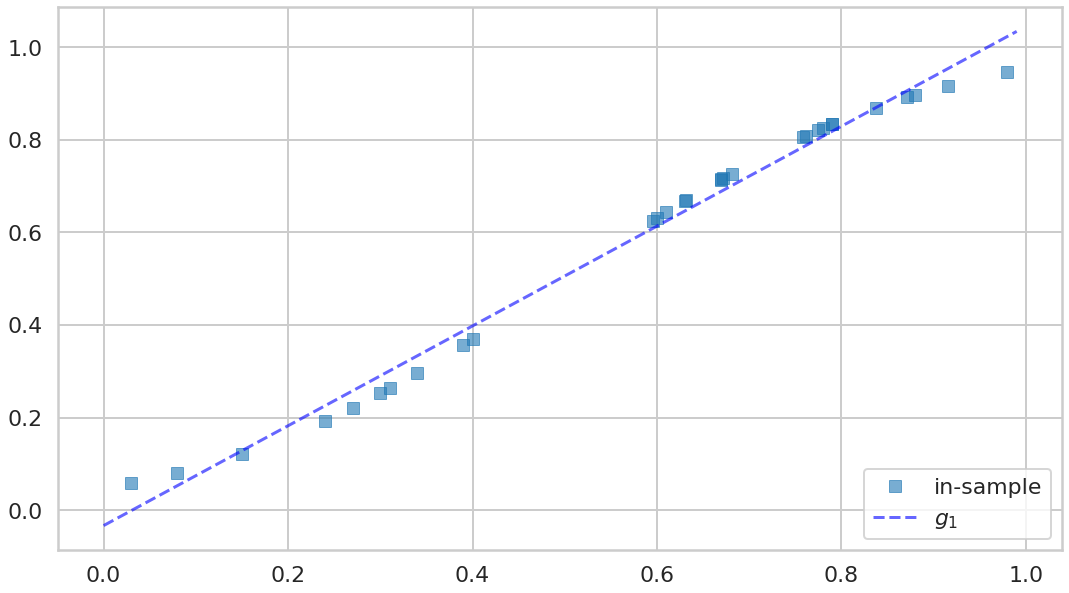

In [13]:
g1 = np.poly1d(np.polyfit(x[indexes], f[indexes],1))
plt.plot(x[indexes], f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x, g1(x), 'b--', alpha=0.6, label="$g_1$");
plt.legend(loc=4)

### Deterministic Error or Bias

In [14]:
g20 = np.poly1d(np.polyfit(x[indexes], f[indexes], 20))

/home/bird/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


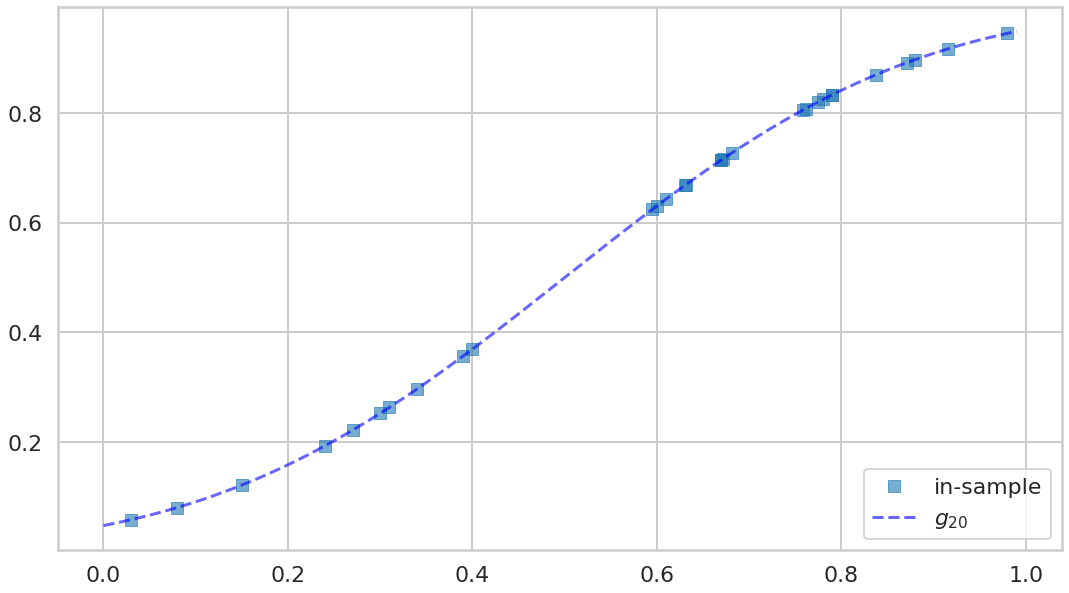

In [17]:
plt.plot(x[indexes], f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x, g20(x), 'b--', alpha=0.6, label="$g_{20}$");
plt.legend(loc=4);

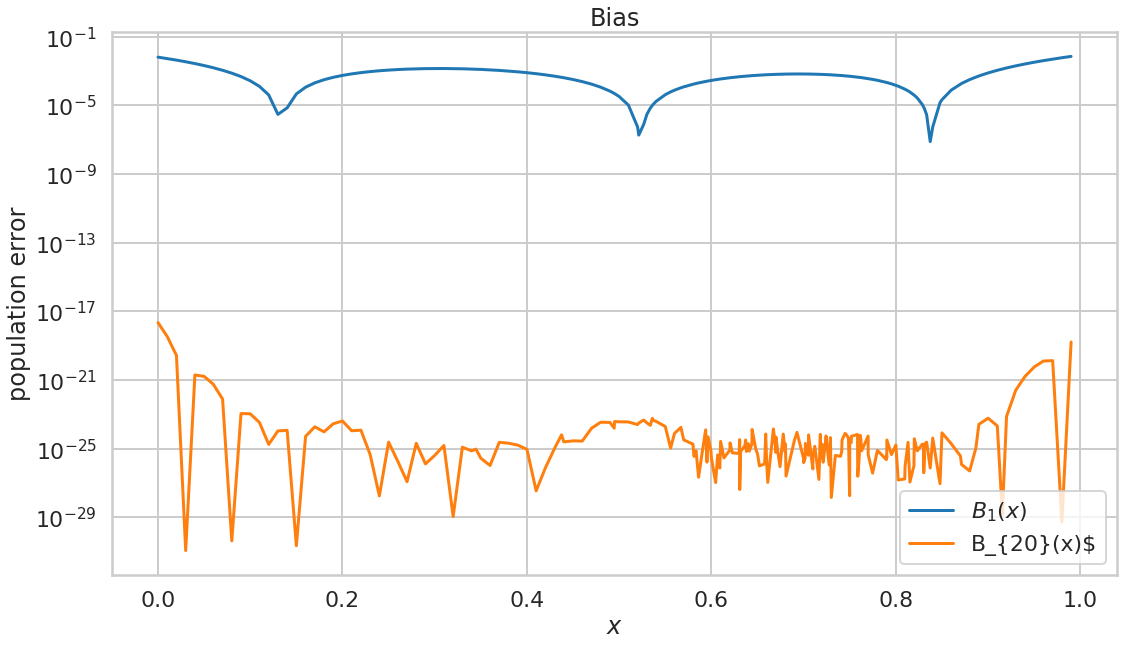

In [18]:
plt.plot(x, (g1(x) - f) ** 2, lw=3, label="$B_1(x)$")
plt.plot(x, (g20(x)- f) ** 2, lw=3, label="B_{20}(x)$");
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4)
plt.title("Bias");

### The role of sampling

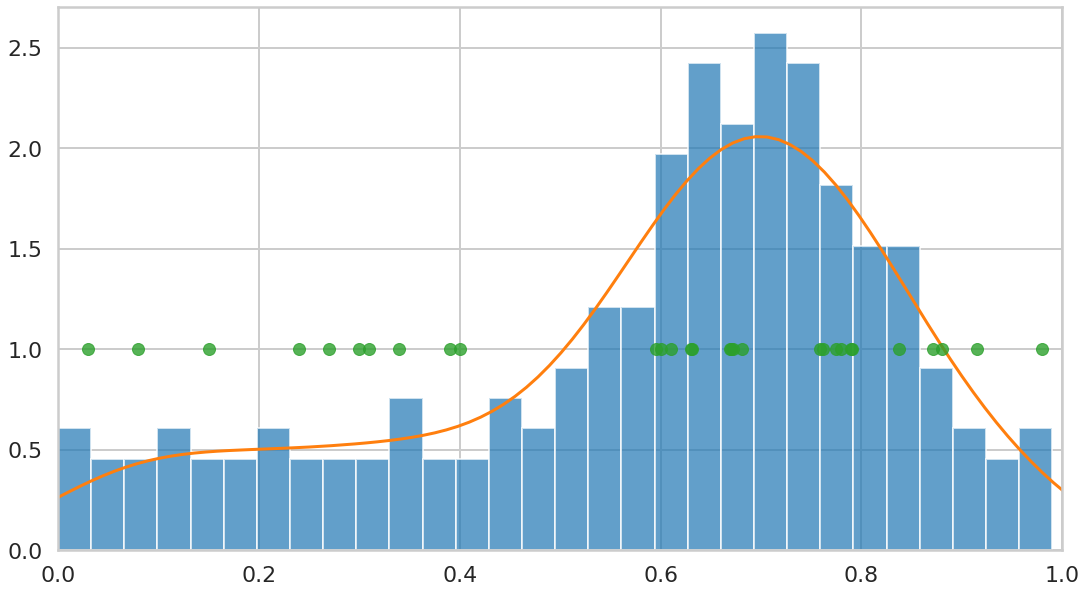

In [19]:
plt.hist(x, density=True, bins=30, alpha=0.7)
sns.kdeplot(x)
plt.plot(x[indexes], [1.0]*len(indexes), 'o', alpha=0.8)
plt.xlim([0, 1]);

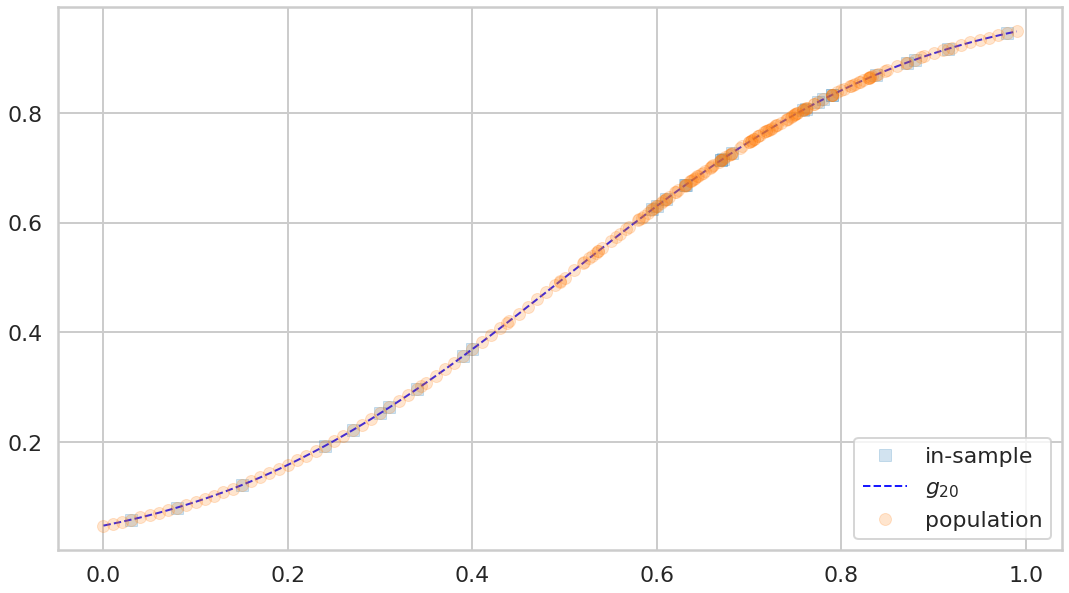

In [22]:
plt.plot(x[indexes], f[indexes], 's', alpha=0.2, label="in-sample");
plt.plot(x, g20(x), 'b--', alpha=0.9, lw=2, label="$g_{20}$");
plt.plot(x, f, 'o', alpha=0.2, label="population");
plt.legend(loc=4)

## Noise

### Stochastic Noise, or the problem with randomness

In [27]:
df.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


In [24]:
x=df.rfrac.values
f=df.promney.values

In [34]:
df.shape

(200, 2)

In [25]:
sigma = 0.06
mask = (x > 0.65) & (x < 0.8)
sigmalist = sigma + mask*0.03

In [26]:
y = f + sp.stats.norm.rvs(scale=sigmalist, size=200)
#the next three lines just ensure that y remains a probability
yadd = (y < 0.0) * (0.01 - y)
ysub = (y > 1.0) * (y - 1.0)
y = y + yadd - ysub

In [36]:
len(y)

200

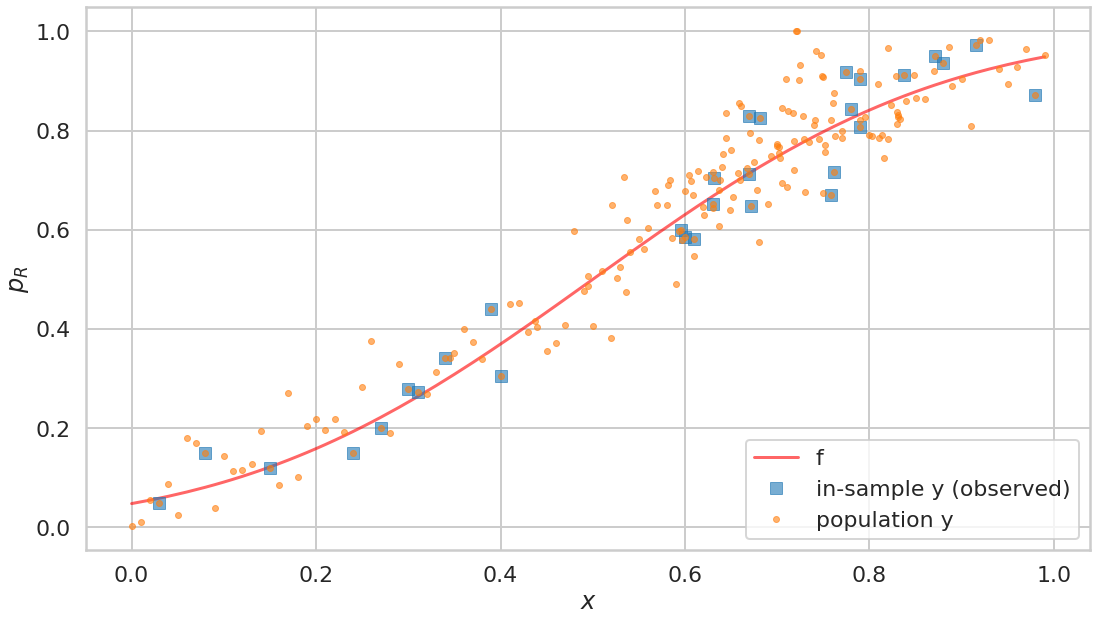

In [28]:
plt.plot(x, f, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes], y[indexes], 's', alpha=0.6, label="in-sample y (observed)");
plt.plot(x, y, '.', alpha=0.6, label="population y");
plt.xlabel('$x$');
plt.ylabel('$p_R$');
plt.legend(loc=4);

### systematic error

In [29]:
g1noisy = np.poly1d(np.polyfit(x[indexes], y[indexes], 1))    # y[indexes]是含有noise的数据
g20noisy = np.poly1d(np.polyfit(x[indexes], y[indexes], 20))

/home/bird/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


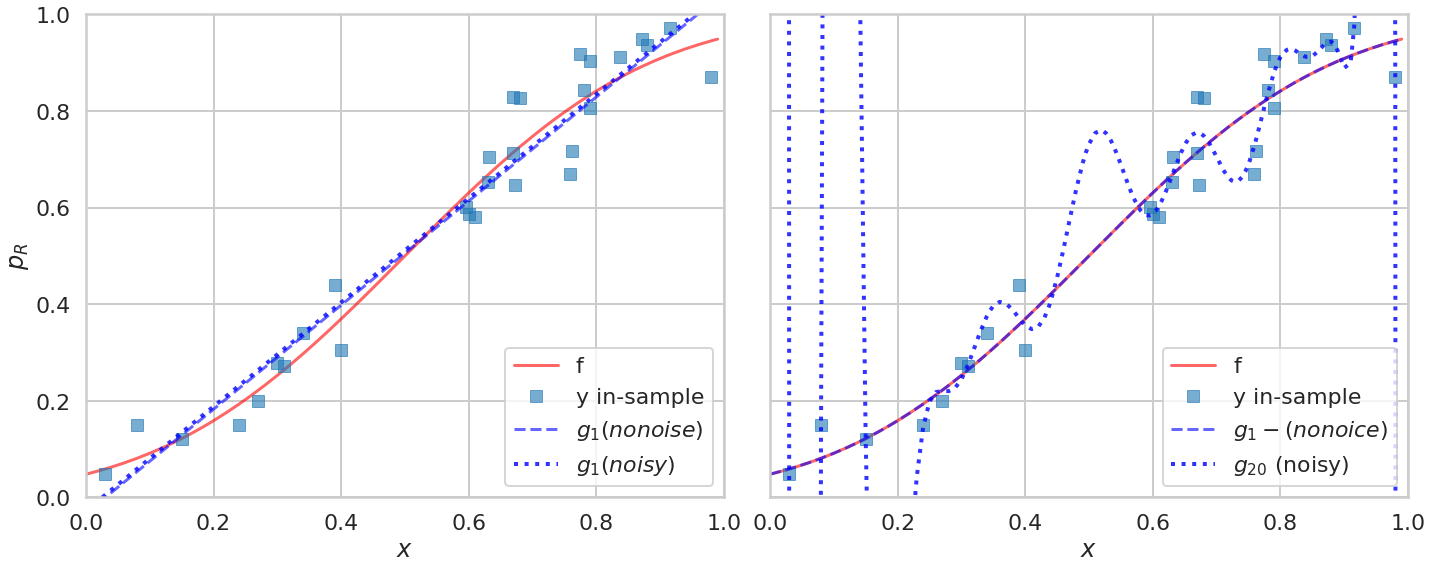

In [31]:
axes=make_plot()
axes[0].plot(x, f, 'r-', alpha=0.6, label="f");
axes[1].plot(x, f, 'r-', alpha=0.6, label="f");
axes[0].plot(x[indexes], y[indexes], 's', alpha=0.6, label="y in-sample");
axes[1].plot(x[indexes], y[indexes], 's', alpha=0.6, label="y in-sample");
axes[0].plot(x, g1(x), 'b--', alpha=0.6, label="$g_1 (no noise)$");
axes[0].plot(x, g1noisy(x), 'b:', lw=4, alpha=0.8, label="$g_1 (noisy)$");
axes[1].plot(x, g20(x), 'b--', alpha=0.6, label="$g_1- (no noice)$");
axes[1].plot(x, g20noisy(x), 'b:', lw=4, alpha=0.8, label="$g_{20}$ (noisy)");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

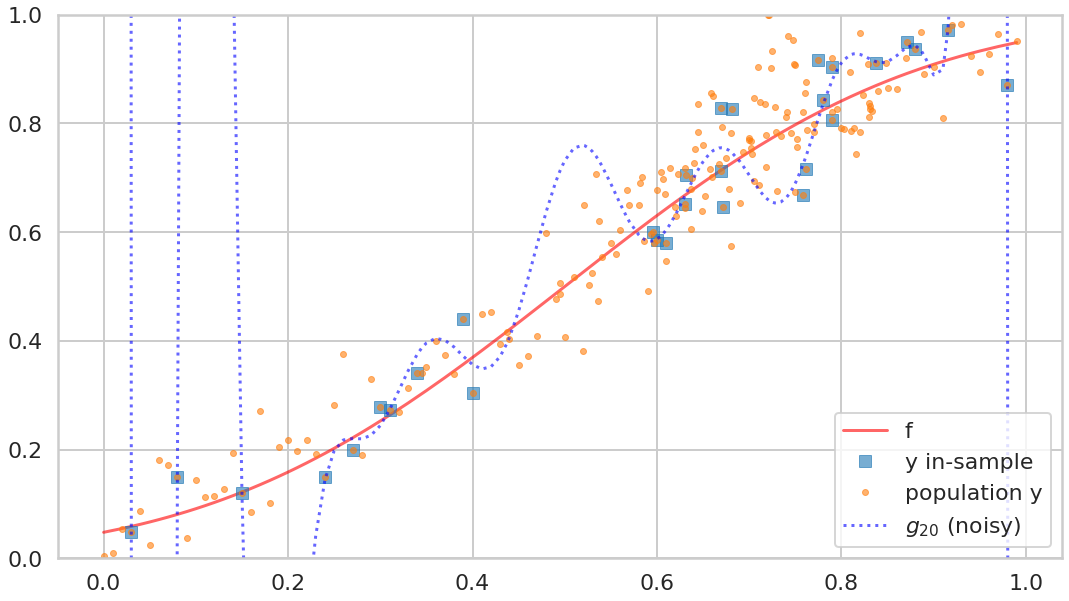

In [32]:
plt.plot(x, f, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes], y[indexes], 's', alpha=0.6, label="y in-sample");
plt.plot(x, y, '.', alpha=0.6, label="population y");
plt.plot(x, g20noisy(x), 'b:', alpha=0.6, label="$g_{20}$ (noisy)");
plt.ylim([0, 1]);
plt.legend(loc=4);

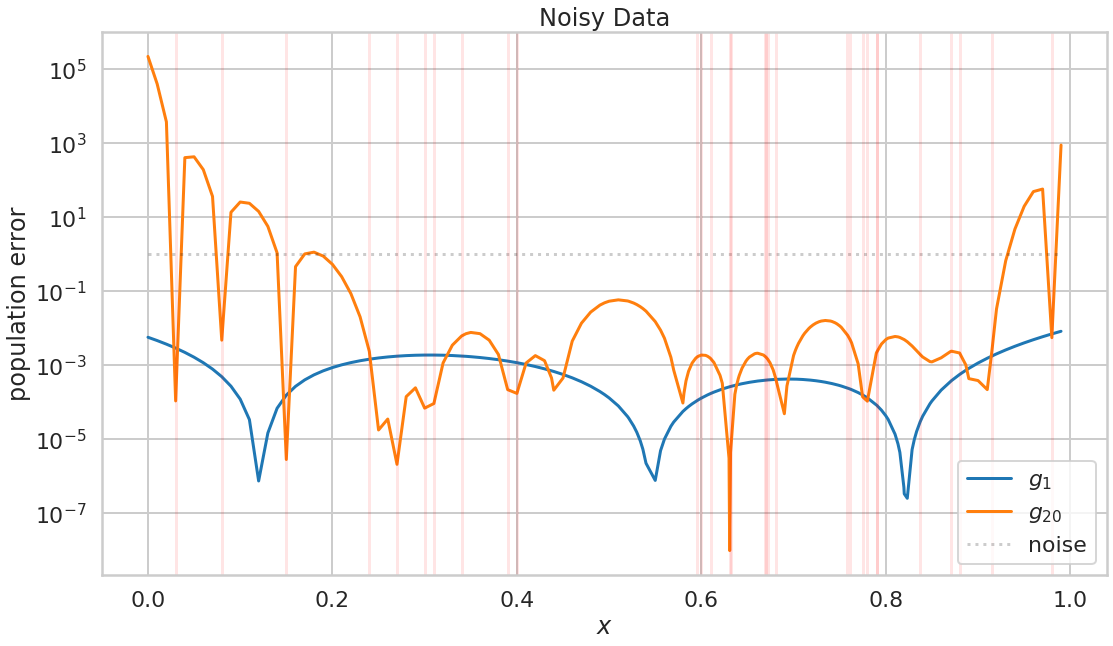

In [37]:
plt.plot(x, ((g1noisy(x)-f)**2), lw=3, label="$g_1$");
plt.plot(x, ((g20noisy(x)-f)**2), lw=3, label="$g_{20}$");
plt.plot(x, [1]*x.shape[0], "k:", label="noise", alpha=0.2);
for i in indexes[:-1]:
    plt.axvline(x[i], 0, 1, color='r', alpha=0.1)

plt.axvline(x[indexes[-1]], 0, 1, color='r', alpha=0.1)
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Noisy Data");

### The Variance of your model

In [40]:
def gen(degree, nsims, size, x, out):
    outpoly=[]
    for i in range(nsims):
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        pc=np.polyfit(x[indexes], out[indexes], degree)
        p=np.poly1d(pc)
        outpoly.append(p)
    return outpoly

In [41]:
polys1 = gen(1, 200, 30, x, y);
polys20 = gen(20, 200, 30, x, y);

/home/bird/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  
/home/bird/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  
/home/bird/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  
/home/bird/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  
/home/bird/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  
/home/bird/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  
/home/bird/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  
/home/bird/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  
/home/bi

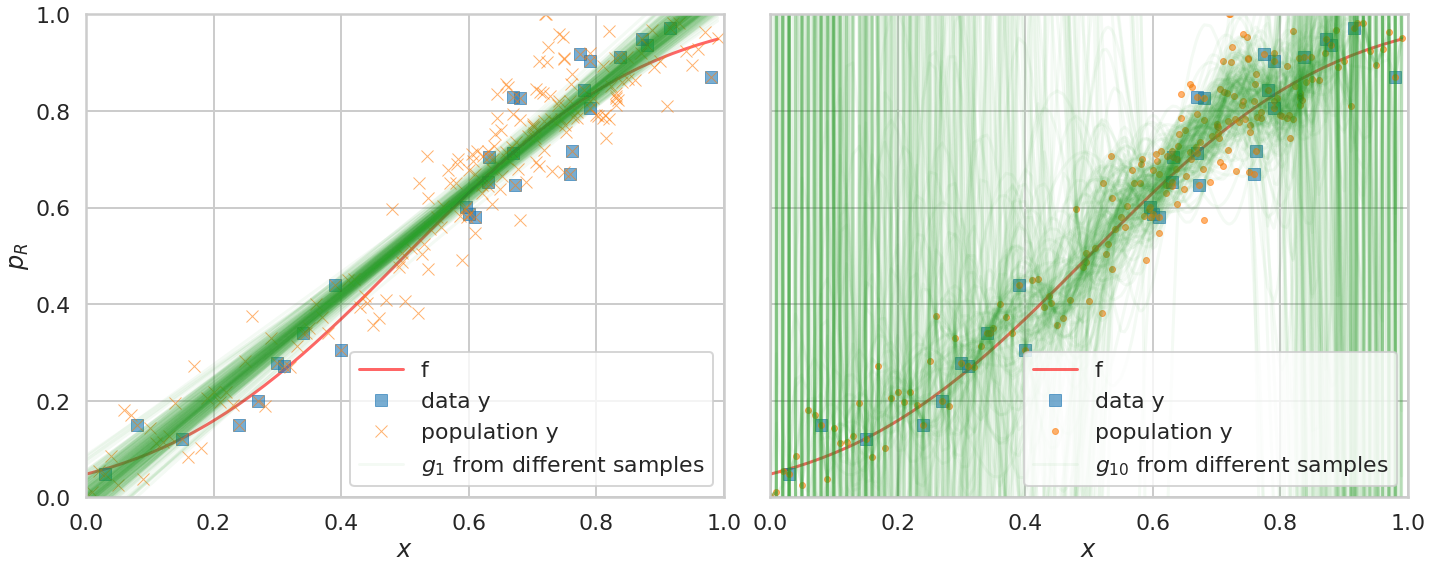

In [45]:
axes=make_plot()
axes[0].plot(x, f, 'r-', lw=3, alpha=0.6, label="f");
axes[1].plot(x, f, 'r-', lw=3, alpha=0.6, label="f");
axes[0].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[1].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[0].plot(x, y, 'x', alpha=0.6, label="population y");
axes[1].plot(x, y, '.', alpha=0.6, label="population y");
c=sns.color_palette()[2]
for i, p in enumerate(polys1[:-1]):
    axes[0].plot(x, p(x), alpha=0.05, c=c)
axes[0].plot(x, polys1[-1](x), alpha=0.05, c=c, label="$g_1$ from different samples")
for i, p in enumerate(polys20[:-1]):
    axes[1].plot(x, p(x), alpha=0.05, c=c)
axes[1].plot(x, polys20[-1](x), alpha=0.05, c=c, label="$g_{10}$ from different samples")
axes[0].legend(loc=4);
axes[1].legend(loc=4);

### Training and Testing Sets

In [46]:
df = pd.DataFrame(dict(x=x[indexes], f=f[indexes], y=y[indexes]))
df.head()

,x,f,y
0,0.03,0.058596,0.048202
1,0.08,0.080757,0.149605
2,0.15,0.121673,0.119888
3,0.24,0.193062,0.149591
4,0.27,0.221640,0.199308


In [48]:
from sklearn.model_selection import train_test_split
datasize=df.shape[0]
itrain, itest = train_test_split(range(30), train_size=24, test_size=6)
xtrain = df.x[itrain].values
ftrain = df.f[itrain].values
ytrain = df.y[itrain].values
xtest = df.x[itest].values
ftest = df.f[itest].values
ytest = df.y[itest].values;

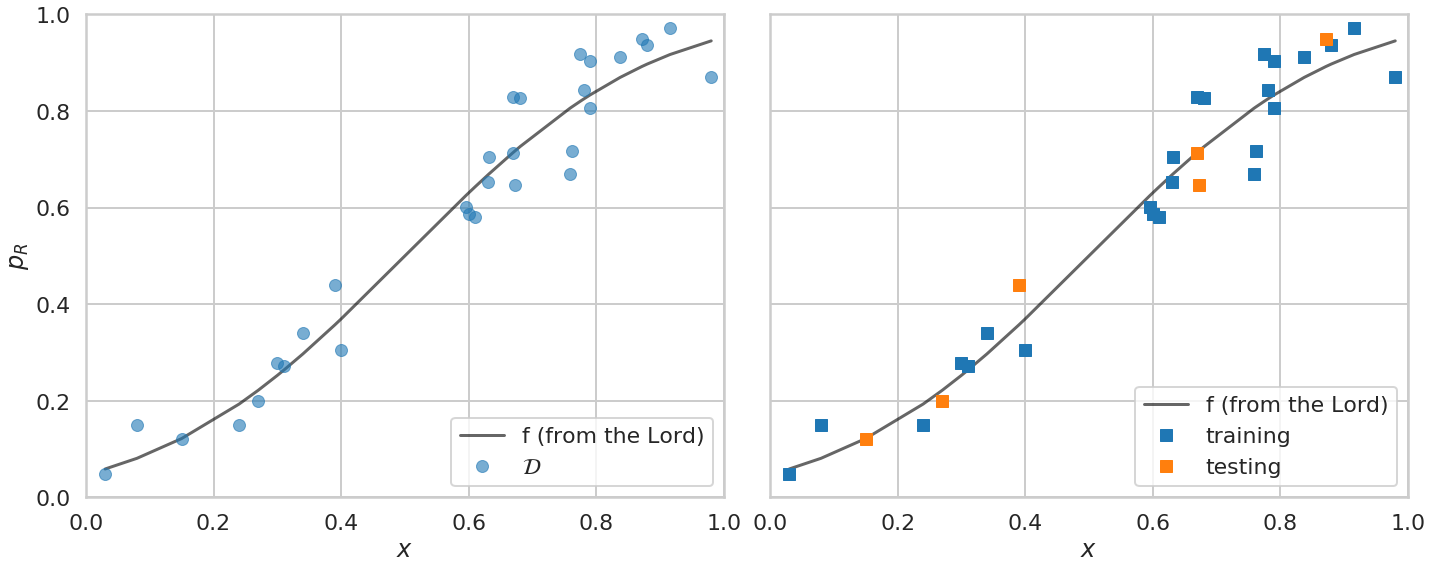

In [49]:
axes = make_plot()
axes[0].plot(df.x, df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(df.x, df.y, 'o', alpha=0.6, label="$\cal{D}$");
axes[1].plot(df.x, df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[1].plot(xtrain, ytrain, 's', label="training")
axes[1].plot(xtest, ytest, 's', label="testing")
axes[0].legend(loc="lower right");
axes[1].legend(loc="lower right");

### scikit-learn api

In [52]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures(3).fit_transform([[1], [2], [3]])

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [53]:
np.array([1, 2, 3]).reshape(-1, 1)

array([[1],
       [2],
       [3]])

In [54]:
xtrain

array([0.31      , 0.61      , 0.63166321, 0.03      , 0.6       ,
       0.79      , 0.75841654, 0.59516207, 0.790102  , 0.66984294,
       0.76128927, 0.63071361, 0.3       , 0.08      , 0.91546575,
       0.24      , 0.98      , 0.34      , 0.68092376, 0.83724472,
       0.4       , 0.78      , 0.77481064, 0.88      ])

In [55]:
xtrain.reshape(-1, 1)

array([[0.31      ],
       [0.61      ],
       [0.63166321],
       [0.03      ],
       [0.6       ],
       [0.79      ],
       [0.75841654],
       [0.59516207],
       [0.790102  ],
       [0.66984294],
       [0.76128927],
       [0.63071361],
       [0.3       ],
       [0.08      ],
       [0.91546575],
       [0.24      ],
       [0.98      ],
       [0.34      ],
       [0.68092376],
       [0.83724472],
       [0.4       ],
       [0.78      ],
       [0.77481064],
       [0.88      ]])

In [56]:
PolynomialFeatures(2).fit_transform(xtrain.reshape(-1, 1))

array([[1.00000000e+00, 3.10000000e-01, 9.61000000e-02],
       [1.00000000e+00, 6.10000000e-01, 3.72100000e-01],
       [1.00000000e+00, 6.31663214e-01, 3.98998416e-01],
       [1.00000000e+00, 3.00000000e-02, 9.00000000e-04],
       [1.00000000e+00, 6.00000000e-01, 3.60000000e-01],
       [1.00000000e+00, 7.90000000e-01, 6.24100000e-01],
       [1.00000000e+00, 7.58416542e-01, 5.75195651e-01],
       [1.00000000e+00, 5.95162068e-01, 3.54217887e-01],
       [1.00000000e+00, 7.90102000e-01, 6.24261170e-01],
       [1.00000000e+00, 6.69842942e-01, 4.48689567e-01],
       [1.00000000e+00, 7.61289271e-01, 5.79561355e-01],
       [1.00000000e+00, 6.30713611e-01, 3.97799659e-01],
       [1.00000000e+00, 3.00000000e-01, 9.00000000e-02],
       [1.00000000e+00, 8.00000000e-02, 6.40000000e-03],
       [1.00000000e+00, 9.15465747e-01, 8.38077534e-01],
       [1.00000000e+00, 2.40000000e-01, 5.76000000e-02],
       [1.00000000e+00, 9.80000000e-01, 9.60400000e-01],
       [1.00000000e+00, 3.40000

In [57]:
def make_features(train_set, test_set, degrees):
    traintestlist=[]
    for d in degrees:
        traintestdict={}
        traintestdict['train'] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1, 1))
        traintestdict['test'] = PolynomialFeatures(d).fit_transform(test_set.reshape(-1, 1))
        traintestlist.append(traintestdict)
    return traintestlist

### Training and Testing Error change with complexity

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees = range(21)
error_train = np.empty(len(degrees))
error_test = np.empty(len(degrees))

traintestlists = make_features(xtrain, xtest, degrees)

In [59]:
traintestlists[3]['train'], ytrain

(array([[1.00000000e+00, 3.10000000e-01, 9.61000000e-02, 2.97910000e-02],
        [1.00000000e+00, 6.10000000e-01, 3.72100000e-01, 2.26981000e-01],
        [1.00000000e+00, 6.31663214e-01, 3.98998416e-01, 2.52032622e-01],
        [1.00000000e+00, 3.00000000e-02, 9.00000000e-04, 2.70000000e-05],
        [1.00000000e+00, 6.00000000e-01, 3.60000000e-01, 2.16000000e-01],
        [1.00000000e+00, 7.90000000e-01, 6.24100000e-01, 4.93039000e-01],
        [1.00000000e+00, 7.58416542e-01, 5.75195651e-01, 4.36237897e-01],
        [1.00000000e+00, 5.95162068e-01, 3.54217887e-01, 2.10817050e-01],
        [1.00000000e+00, 7.90102000e-01, 6.24261170e-01, 4.93229999e-01],
        [1.00000000e+00, 6.69842942e-01, 4.48689567e-01, 3.00551540e-01],
        [1.00000000e+00, 7.61289271e-01, 5.79561355e-01, 4.41213842e-01],
        [1.00000000e+00, 6.30713611e-01, 3.97799659e-01, 2.50897660e-01],
        [1.00000000e+00, 3.00000000e-01, 9.00000000e-02, 2.70000000e-02],
        [1.00000000e+00, 8.00000000e-0

In [60]:
traintestlists[3]['test'], ytest

(array([[1.        , 0.87121681, 0.75901872, 0.66126987],
        [1.        , 0.15      , 0.0225    , 0.003375  ],
        [1.        , 0.6717333 , 0.45122563, 0.30310328],
        [1.        , 0.66917186, 0.44779098, 0.29964912],
        [1.        , 0.27      , 0.0729    , 0.019683  ],
        [1.        , 0.39      , 0.1521    , 0.059319  ]]),
 array([0.94997047, 0.11988775, 0.64709854, 0.71286053, 0.19930808,
        0.43985757]))

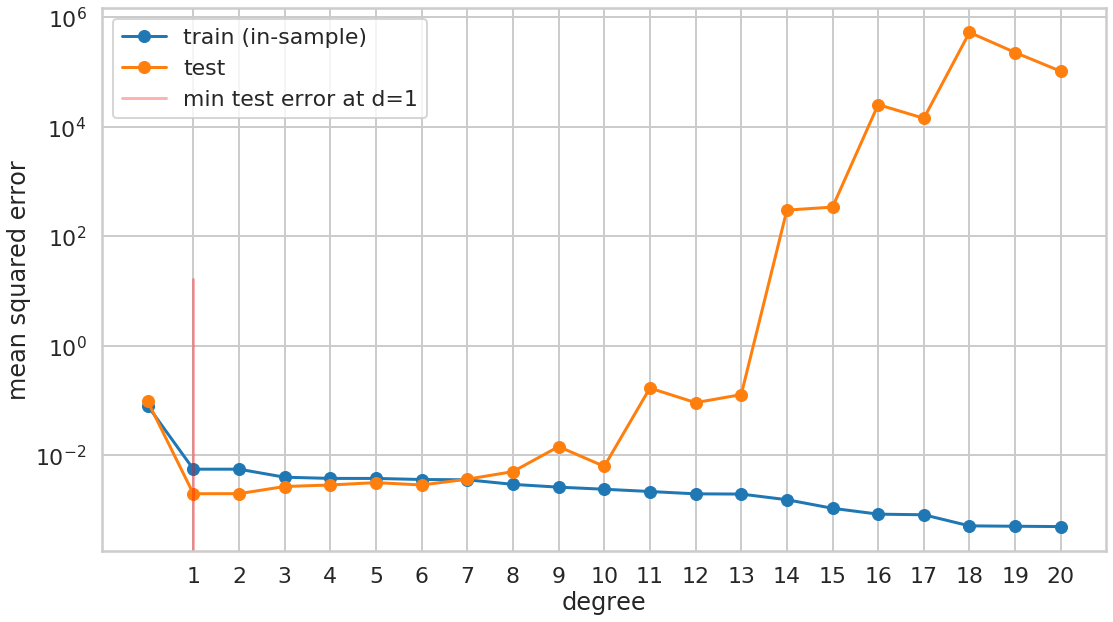

In [64]:
for d in degrees:
    Xtrain = traintestlists[d]['train']
    Xtest = traintestlists[d]['test']
    
    # set up model
    est = LinearRegression()  # from sklearn.linear_model import LinearRegression
    # fit
    est.fit(Xtrain, ytrain)
    # predict
    prediction_on_training = est.predict(Xtrain)
    prediction_on_testing = est.predict(Xtest)
    # calculate mean squared error
    error_train[d] = mean_squared_error(ytrain, prediction_on_training)  # from sklearn.metrics import mean_squared_error
    error_test[d] = mean_squared_error(ytest, prediction_on_testing)
    
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_test, marker='o', label='test')
plt.axvline(np.argmin(error_test), 0, 0.5, color='r', label="min test error at d=%d"%np.argmin(error_test), alpha=0.3)
plt.ylabel("mean squared error")
plt.xlabel("degree")
plt.legend(loc="upper left")
plt.yscale("log");
plt.xticks(np.arange(1,21, step=1));

### validation

6


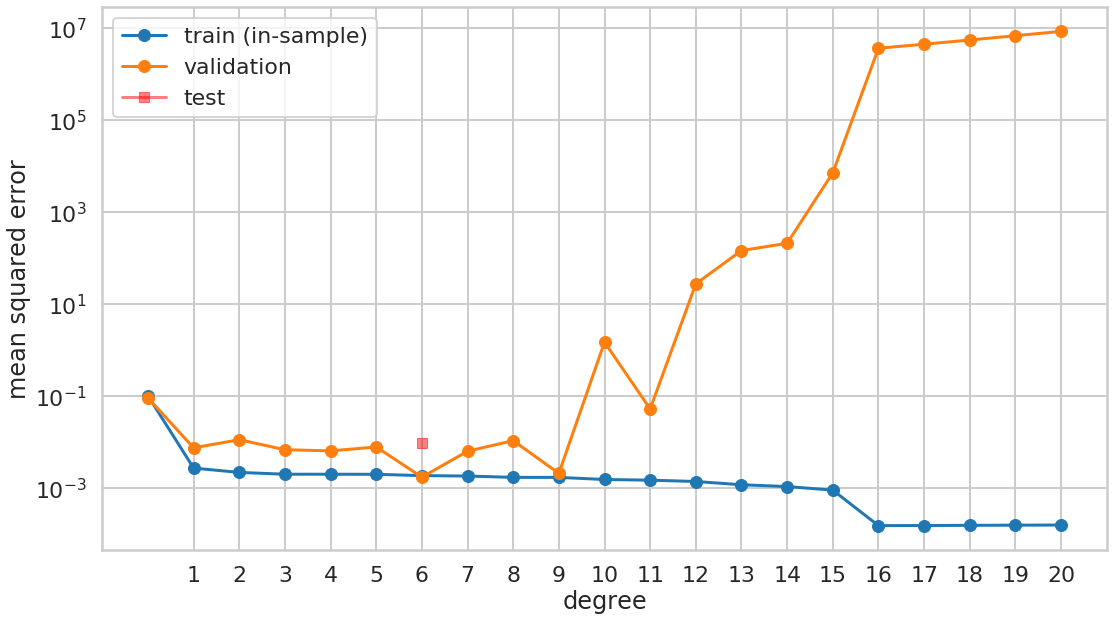

In [65]:
# split to train-test
itrain, itest = train_test_split(range(30), train_size=24, test_size=6)

xtrain = df.x[itrain].values
ftrain = df.f[itrain].values
ytrain = df.y[itrain].values

xtest = df.x[itest].values
ftest = df.f[itest].values
ytest = df.y[itest].values

# further split the training dataset to train-valide. So we will have train-validate-test, 3 parts.
intrain, invalid = train_test_split(itrain, train_size=18, test_size=6)

xntrain = df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values

xnvalid = df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

degrees = range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=make_features(xntrain, xnvalid, degrees)

for d in degrees:
    # create polynomials from x
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    # fit a model linear in polynomial coeeficients on the new smaller training set
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    # predict on new training and validation sets and calculate mean squared error
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))
    
# calculate the degree at which validation error is minized
mindeg = np.argmin(error_valid)
ttlist = make_features(xtrain, xtest, degrees)
# fit on whole training set now.
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
# predict on the test set now and calculate error
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)

plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale('log')
plt.xticks(np.arange(1, 21, step=1));
print(mindeg);

Do it again with a new random split:

4


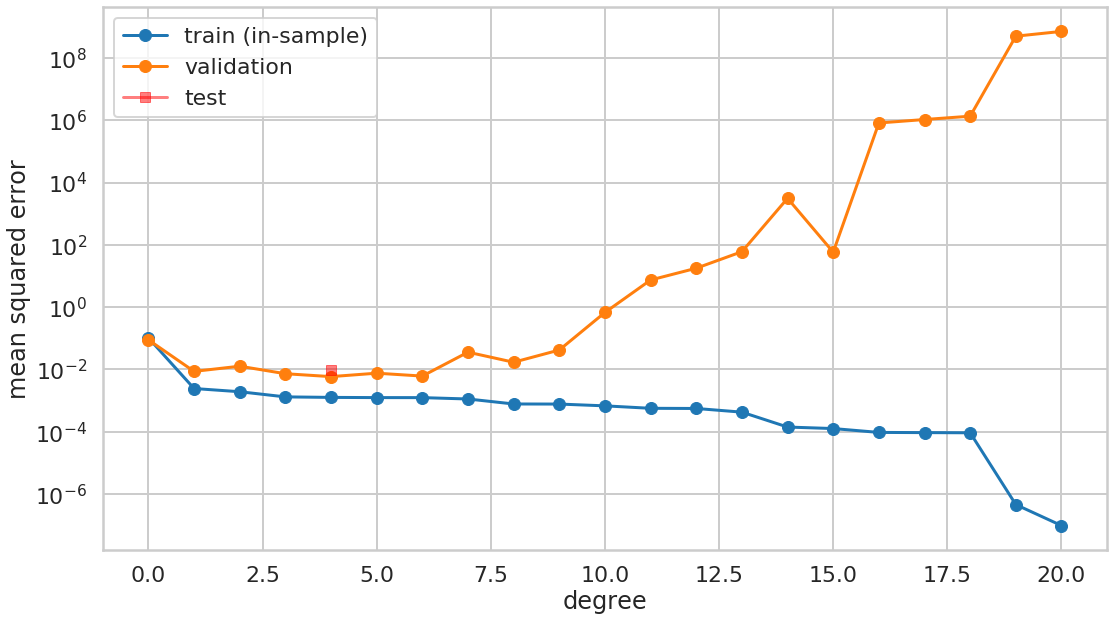

In [71]:
intrain, invalid = train_test_split(itrain, train_size=18, test_size=6)
xntrain = df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values
xnvalid = df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

degrees = range(21)
error_train = np.empty(len(degrees))
error_valid = np.empty(len(degrees))
trainvalidlists = make_features(xntrain, xnvalid, degrees)

for d in degrees:
    # create polynomials from x
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    # fit a model linear in polynomial coefficients on the training set
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    # calcultate mean squared error
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))
    
mindeg = np.argmin(error_valid)
ttlist = make_features(xtrain, xtest, degrees)
# fit on whole training set now
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')

plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale('log')
print(mindeg);


### Cross Validation

In [76]:
from sklearn.model_selection import KFold
n_folds = 4
degrees = range(21)
results = []

for d in degrees:
    hypothesisresults=[]
    for train, test in KFold(n_folds).split(np.arange(24)):
        tvlist=make_features(xtrain[train], xtrain[test], degrees)
        clf = LinearRegression()
        clf.fit(tvlist[d]['train'], ytrain[train]) # fit
        hypothesisresults.append(mean_squared_error(ytrain[test], clf.predict(tvlist[d]['test'])))
    results.append((np.mean(hypothesisresults), np.min(hypothesisresults), np.max(hypothesisresults)))        

In [77]:
results

[(0.11046997164633822, 0.08551237022646672, 0.13347504885560105),
 (0.005193618667466485, 0.0018666803289675898, 0.011133187614867654),
 (0.006099484726046158, 0.0018845670315889437, 0.013827902267186559),
 (0.004371092253878696, 0.0004863200258038454, 0.008809329411431081),
 (0.0039276633637332576, 0.0006352541374479599, 0.008540766990090359),
 (0.006236759700257721, 0.000341482822429323, 0.012029822720532867),
 (0.007117807972187709, 0.000498439953147382, 0.015244276592719383),
 (0.006416912131927681, 0.0004842233666147138, 0.012624232299601417),
 (0.025145766136194528, 0.00024167349678579, 0.056744745534756495),
 (0.1433887294732726, 0.004586780936228709, 0.4304537068615664),
 (0.7986517733676747, 0.005428262748382106, 2.7285820328909955),
 (2.1078406854675267, 0.005090712587984897, 6.909031899183702),
 (94.397925385884, 0.004183560636683358, 260.23901485805067),
 (3759.1691753394357, 0.005465969434010978, 14373.775534480359),
 (7189.219974996703, 1.7584119026452647, 24831.225627692

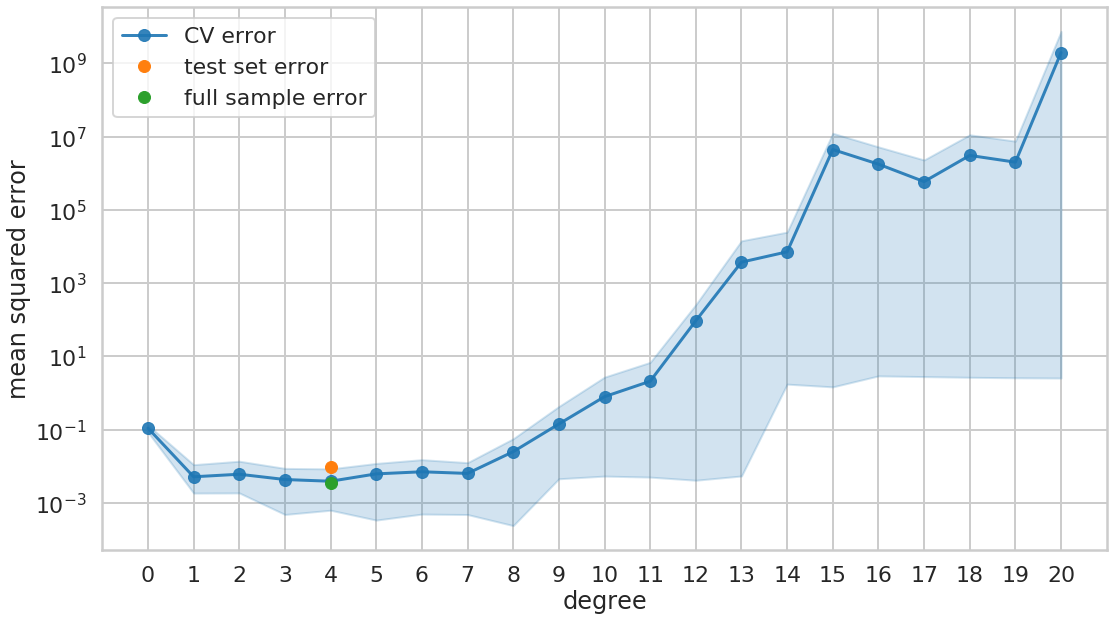

In [83]:
mindeg = np.argmin([r[0] for r in results])
ttlist = make_features(xtrain, xtest, degrees)
# fit on whole training set now
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(pred, ytest)
errtr = mean_squared_error(ytrain, clf.predict(ttlist[mindeg]['train']))
errout = 0.8*errtr + 0.2*err
c0 = sns.color_palette()[0]
#plt.errorbar(degrees, [r[0] for r in results], yerr=[r[1] for r in results], marker='o', label='CV error', alpha=0.5)
plt.plot(degrees, [r[0] for r in results], marker='o', label='CV error', alpha=0.9)
plt.fill_between(degrees, [r[1] for r in results], [r[2] for r in results], color=c0, alpha=0.2)
plt.plot([mindeg], [err], 'o', label='test set error')
plt.plot([mindeg], [errout], 'o', label='full sample error')

plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=1));

### Regularization

(100, 3)


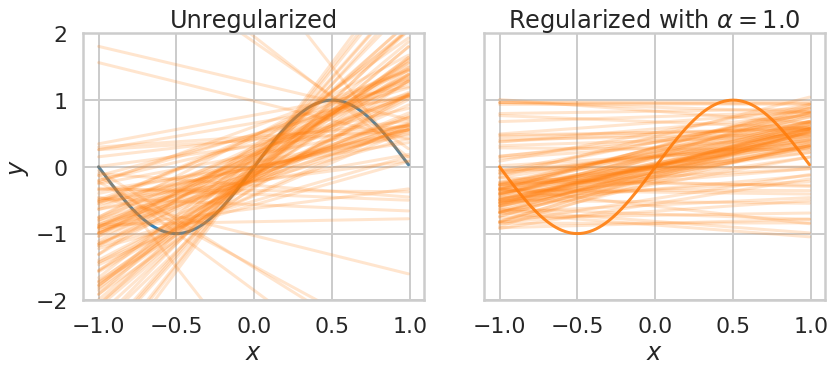

In [85]:
xs = np.arange(-1., 1., 0.01)
ff = lambda x: np.sin(np.pi*x)
ffxs = ff(xs)

from sklearn.linear_model import Ridge
axes = make_simple_plot()
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
axes[0].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
axes[1].plot(xs, ff(xs), alpha=0.9, lw=3, color=c1)

D = np.empty((100, 3), dtype="int")
print(D.shape)
for i in range(100):
    D[i, :] = np.random.choice(200, replace=False, size=3)
for i in range(100):
    choices = D[i, :]
    p1 = np.polyfit(xs[choices], ffxs[choices], 1)
    est = Ridge(alpha=1.0)
    est.fit(xs[choices].reshape(-1, 1), ffxs[choices])
    axes[0].plot(xs, np.polyval(p1, xs), color=c1, alpha=0.2)
    axes[1].plot(xs, est.predict(xs.reshape(-1, 1)), color=c1, alpha=0.2)
axes[0].set_title("Unregularized");
axes[1].set_title("Regularized with $\\alpha=1.0$");

### Regularization of the Romney model with Cross-Validation

In [86]:
def plot_functions(est, ax, df, alpha, xtest, Xtest, xtrain, ytrain):
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', label='training', alpha=0.4)
    ax.plot(xtest, ytest, 's', label="testing", alpha=0.6)
    transx = np.arange(0, 1.1, 0.01)
    transX = PolynomialFeatures(20).fit_transform(transx.reshape(-1, 1))
    ax.plot(transx, est.predict(transX), '.', label="alpha = %s" % str(alpha))
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')
    
def plot_coefficients(est, ax, alpha):
    coef = est.coef_.ravel()
    ax.semilogy(np.abs(coef), marker='o', label="alpha = %s" % str(alpha))
    ax.set_ylim((1e-1, 1e15))
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.legend(loc='upper left')

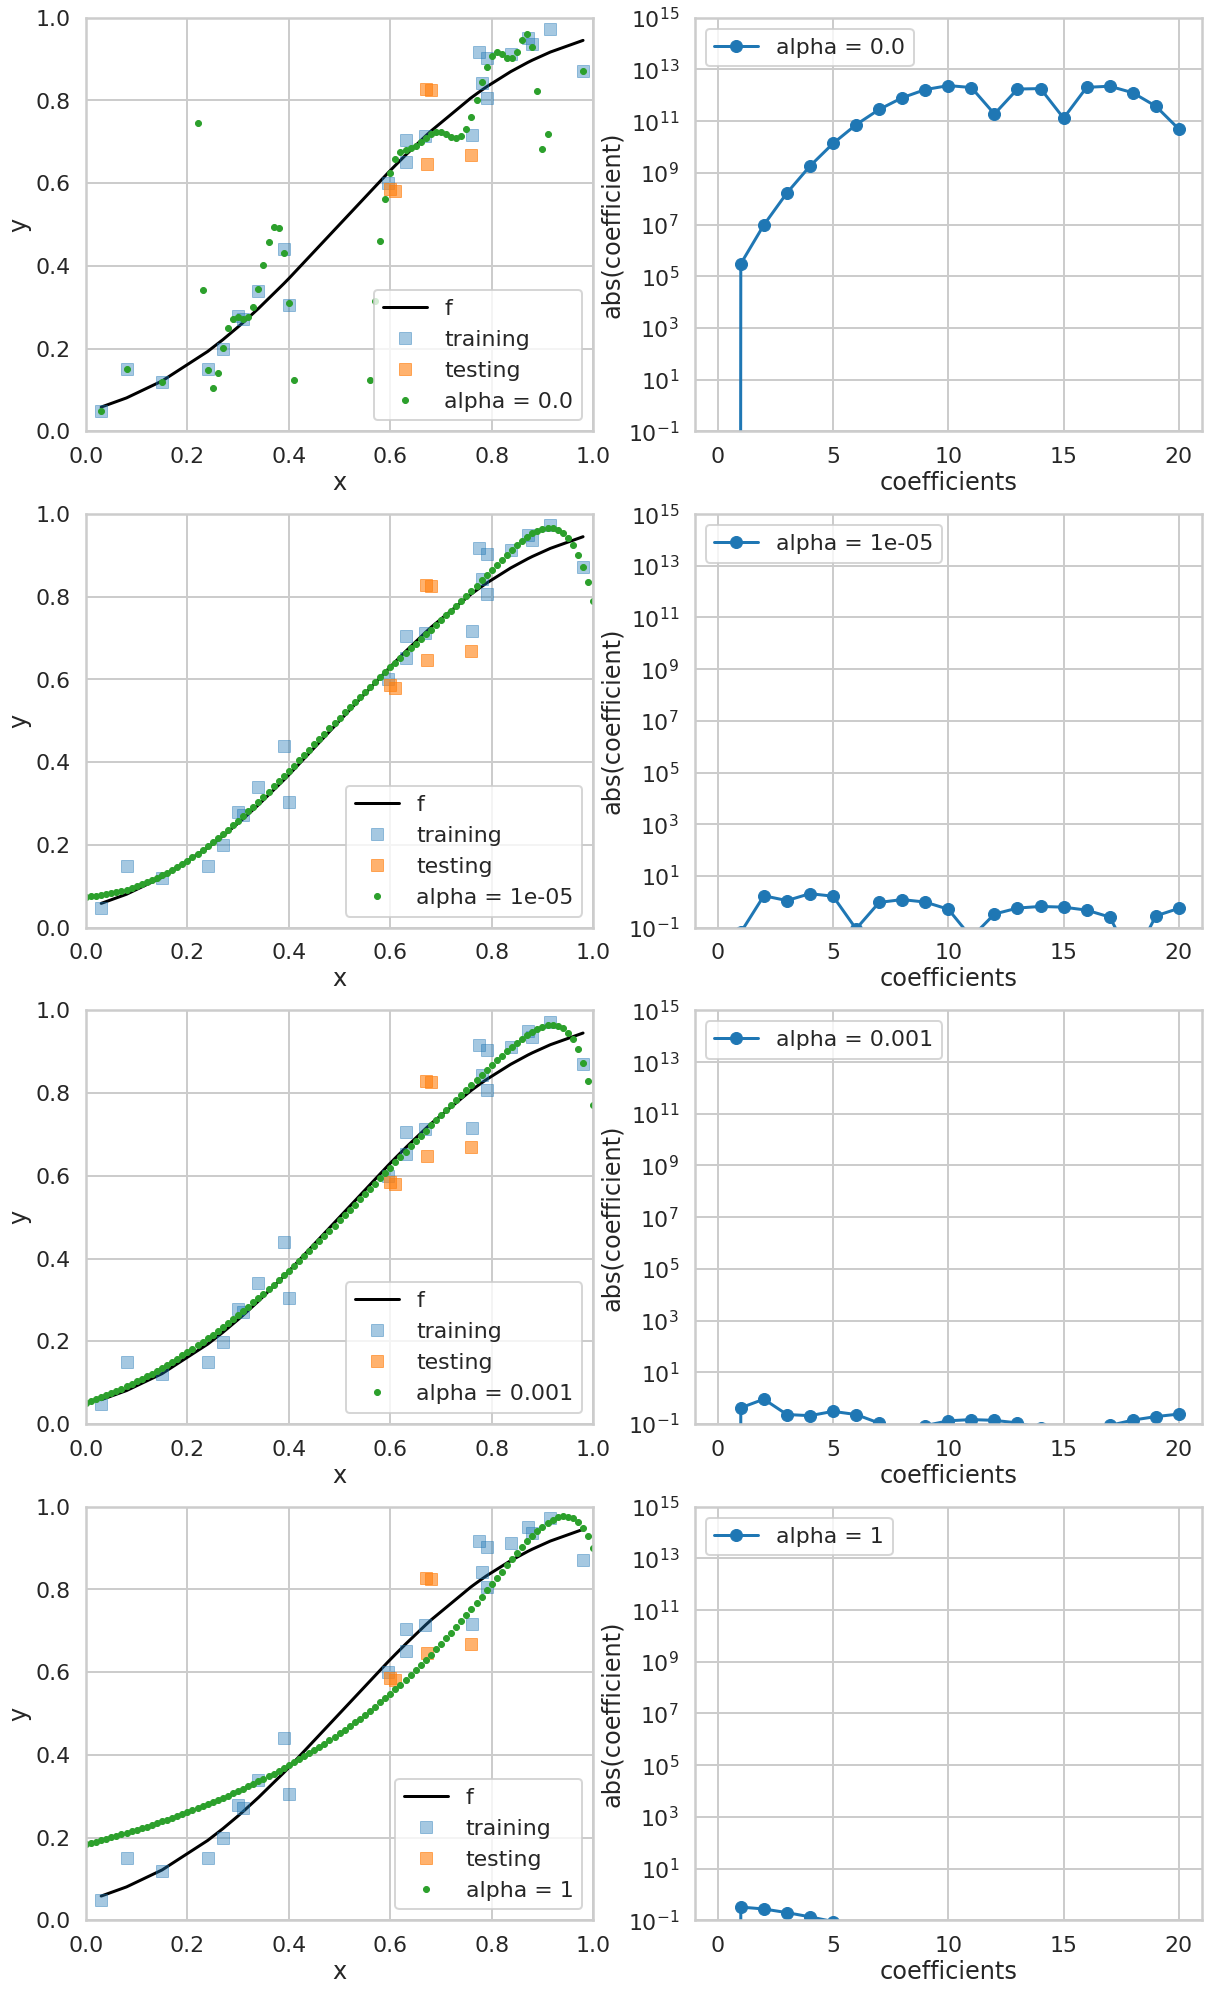

In [113]:
fig, rows = plt.subplots(4, 2, figsize=(20, 35))
d=20
alphas = [0.0, 1e-5, 1e-3, 1]
Xtrain = traintestlists[d]['train']
Xtest = traintestlists[d]['test']
for i, alpha in enumerate(alphas):
    l, r = rows[i]
    est = Ridge(alpha=alpha)
    est.fit(Xtrain, ytrain)
    plot_functions(est, l, df, alpha, xtest, Xtest, xtrain, ytrain)
    plot_coefficients(est, r, alpha)

In [114]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
def cv_optimize_ridge(X, y, n_folds=4):
    clf = Ridge()
    parameters = {"alpha": [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-1, 1.0]}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="neg_mean_squared_error")
    gs.fit(X, y)
    return gs

In [125]:
fitmodel = cv_optimize_ridge(Xtrain, ytrain, n_folds=4)

In [126]:
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_

(Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 {'alpha': 0.0001},
 -0.002956456699740307)

In [127]:
alphawechoose = fitmodel.best_params_['alpha']
clf = Ridge(alpha=alphawechoose).fit(Xtrain, ytrain)
err = mean_squared_error(clf.predict(Xtest), ytest)
errtr=mean_squared_error(clf.predict(Xtrain), ytrain)
errout = 0.8*errtr + 0.2*err

In [128]:
def plot_functions_onall(est, ax, df, alpha, xtrain, ytrain, Xtrain, xtest, ytest):
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', alpha=0.4, label="train")
    ax.plot(xtest, ytest, 's', alpha=0.6, label='test')
    transx=np.arange(0, 1.1, 0.01)
    transX = PolynomialFeatures(20).fit_transform(transx.reshape(-1, 1))
    ax.plot(transx, est.predict(transX), '.', alpha=0.6, label="alpha = %s" % str(alpha))
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')

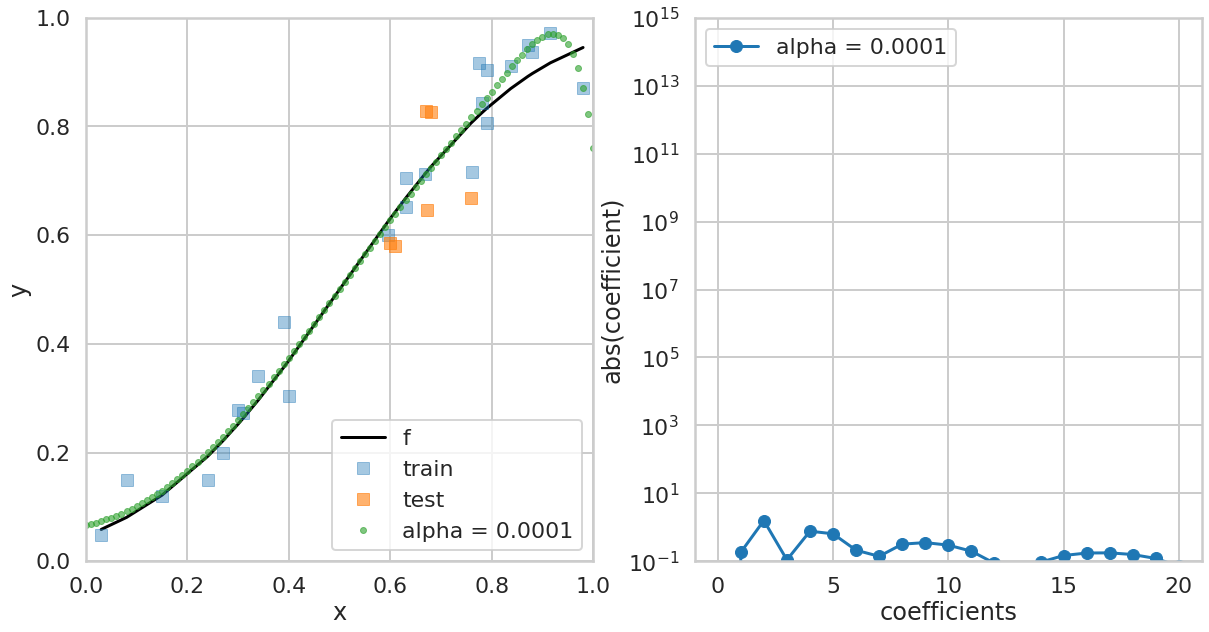

In [129]:
fig, rows = plt.subplots(1, 2, figsize=(20, 10))
l, r = rows
plot_functions_onall(clf, l, df, alphawechoose, xtrain, ytrain, Xtrain, xtest, ytest)
plot_coefficients(clf, r, alphawechoose)